In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [11]:
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*.csv'
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    for filename in glob.glob(path):
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            ksize = int(filename[-22:-20])
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    print(len(kernel_sizes), len(accuracy_values))
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
    print(kernel_sizes, accuracy_values)
    return kernel_sizes, accuracy_values

In [36]:
layers0 = '4cnn'
max_length0 = '40mlength'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)

6 6
(3, 5, 7, 8, 9, 10) (0.9632967239275322, 0.9634375293344598, 0.9665352482868677, 0.9612315779592604, 0.9624988266216088, 0.962404956350324)


In [37]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)

11 11
(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) (0.9687411996620672, 0.9671923401858632, 0.9640007509621704, 0.9657842861165868, 0.9624518914859664, 0.9600112644325542, 0.9635783347413874, 0.9663475077442972, 0.9653149347601616, 0.9632497887918896, 0.9630151131136768)


In [38]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)

18 18
(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20) (0.9666760536937952, 0.9658312212522294, 0.9639068806908851, 0.9644701023185956, 0.9638130104196, 0.9630620482493194, 0.9618417347226134, 0.9645170374542382, 0.9657373509809444, 0.962404956350324, 0.9630151131136768, 0.9617947995869708, 0.9639538158265276, 0.9610907725523328, 0.9637660752839576, 0.9589786914484184, 0.960339810382052, 0.9593541725335586)


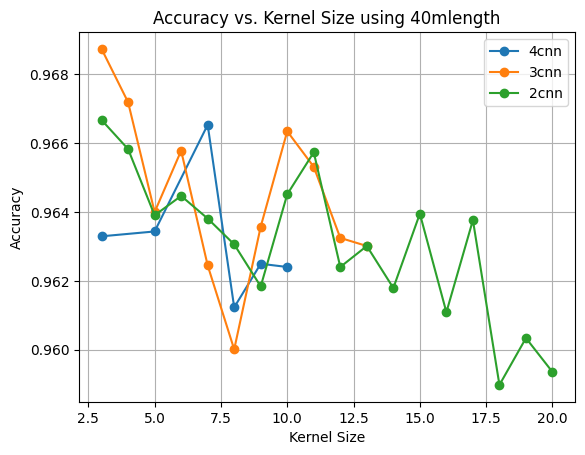

In [39]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Size using {0}'.format(max_length0))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.show()